In [1]:
import pandas as pd
import utils_comp as utils

### Load data from 'N-k_CENTRALITY.ipynb' and 'N-k_MAX_FLOW.ipynb'

In [2]:
centrality_random_node_removal_df = pd.read_pickle('results/centrality/random_node_removal.pkl')
centrality_greedy_node_removal_df = pd.read_pickle('results/centrality/greedy_node_removal.pkl')

max_flow_random_node_removal_df = pd.read_pickle('results/max_flow/sinks_sources_flow_index/random_node_removal_df.pkl')
max_flow_greedy_node_removal_df = pd.read_pickle('results/max_flow/sinks_sources_flow_index/wfcr_node_removal_df.pkl')

centrality_random_edge_removal_df = pd.read_pickle('results/centrality/random_edge_removal.pkl')
centrality_greedy_edge_removal_df = pd.read_pickle('results/centrality/greedy_edge_removal.pkl')

max_flow_random_edge_removal_df = pd.read_pickle('results/max_flow/sinks_sources_flow_index/random_edge_removal_df.pkl')
max_flow_greedy_edge_removal_df = pd.read_pickle('results/max_flow/sinks_sources_flow_index/wfcr_edge_removal_df.pkl')

# Node

### Random

AUC for composite: 50.51
AUC for capacity_robustness_max_flow: 63.55

composite: [max ROC: 0.27907, avg ROC: 0.27900]
capacity_robustness_max_flow: [max ROC: 0.21084, avg ROC: 0.21081]



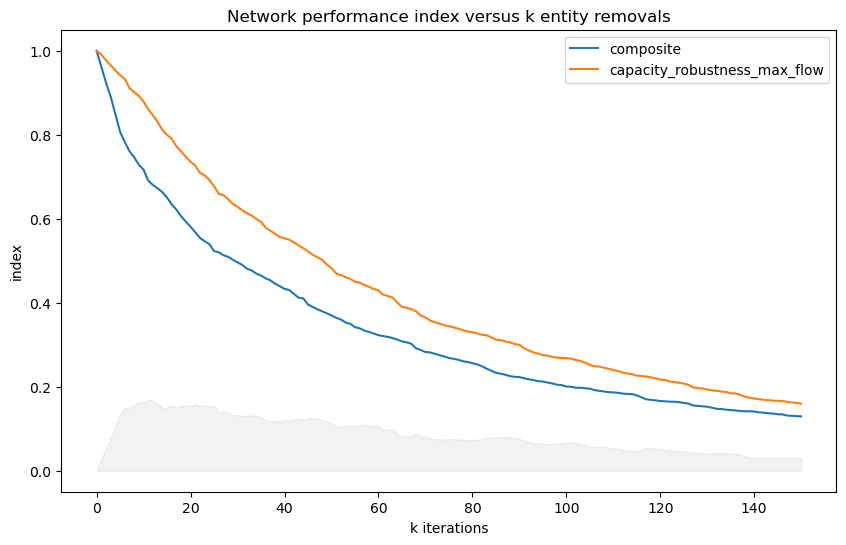

In [3]:
utils.plot_metrics(centrality_random_node_removal_df, max_flow_random_node_removal_df, 'composite', 'capacity_robustness_max_flow')

### Greedy

AUC for composite: 11.36
AUC for capacity_robustness_max_flow: 16.95

composite: [max ROC: 1.30234, avg ROC: 1.29857]
capacity_robustness_max_flow: [max ROC: 0.98839, avg ROC: 0.98692]



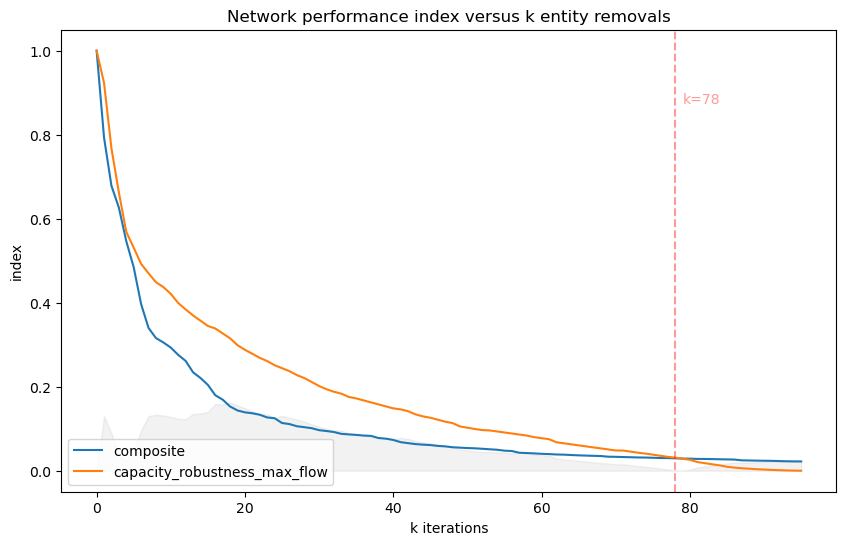

In [4]:
utils.plot_metrics(centrality_greedy_node_removal_df, max_flow_greedy_node_removal_df, 'composite', 'capacity_robustness_max_flow')

In [5]:
pd.set_option('display.max_rows', None)

df = utils.common_entities(centrality_greedy_node_removal_df, max_flow_greedy_node_removal_df)
df

20 common entity removals
95 greedy entity removals before 'wfcr' reached 0 (limiting metric)

Variance of index differences of common entities: 918.0


,removed_entity,k_iteration [centrality],k_iteration [max_flow],diff
0,N_kremenchuk,21,31,10
1,INET_N_1545,5,3,-2
2,NO_N_32,16,34,18
3,INET_N_435,46,11,-35
4,INET_N_551,18,56,38
5,INET_N_1239,90,67,-23
6,INET_N_999,62,72,10
7,INET_N_1219,4,4,0
8,INET_N_1244,95,66,-29
9,INET_N_272,23,16,-7


# Edge

### Random

AUC for composite: 56.53
AUC for capacity_robustness_max_flow: 81.39

composite: [max ROC: 0.22259, avg ROC: 0.22256]
capacity_robustness_max_flow: [max ROC: 0.08305, avg ROC: 0.08305]



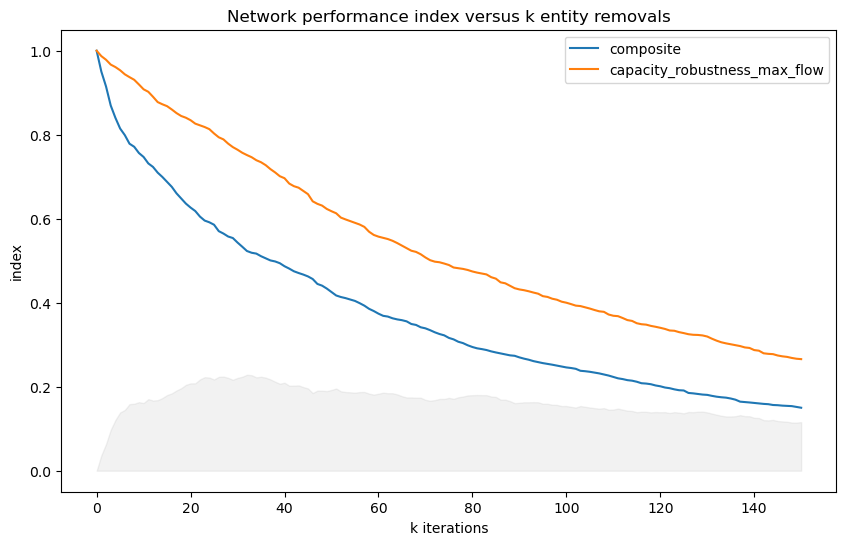

In [6]:
utils.plot_metrics(centrality_random_edge_removal_df, max_flow_random_edge_removal_df, 'composite', 'capacity_robustness_max_flow')

### Greedy

AUC for composite: 20.54
AUC for capacity_robustness_max_flow: 18.36

composite: [max ROC: 0.83313, avg ROC: 0.83190]
capacity_robustness_max_flow: [max ROC: 0.76229, avg ROC: 0.76137]



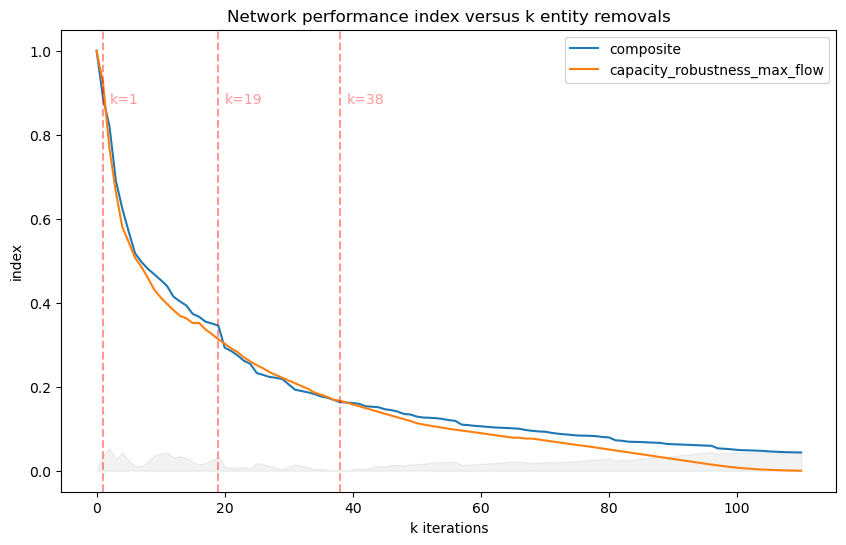

In [7]:
utils.plot_metrics(centrality_greedy_edge_removal_df, max_flow_greedy_edge_removal_df, 'composite', 'capacity_robustness_max_flow')

In [8]:
utils.common_entities(centrality_greedy_edge_removal_df, max_flow_greedy_edge_removal_df)

18 common entity removals
110 greedy entity removals before 'wfcr' reached 0 (limiting metric)

Variance of index differences of common entities: 1710.0


,removed_entity,k_iteration [centrality],k_iteration [max_flow],diff
0,"(NO_N_13, NO_N_12)",48,25,-23
1,"(INET_N_157, INET_N_577)",84,28,-56
2,"(INET_N_279, INET_N_1000)",54,5,-49
3,"(INET_N_1637, INET_N_1620)",1,2,1
4,"(INET_N_805, INET_N_394)",108,56,-52
5,"(INET_N_1599, INET_N_435)",38,9,-29
6,"(INET_N_1607, INET_N_1583)",91,52,-39
7,"(INET_N_870, INET_N_1219)",3,4,1
8,"(INET_N_1231, INET_N_658)",16,97,81
9,"(NO_N_4, NO_N_5)",5,1,-4
